# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.102290e+01     7.041416e+00
 * time: 0.0018489360809326172
     1     2.840777e+01     4.949200e+00
 * time: 0.006920814514160156
     2     2.097527e+01     5.716790e+00
 * time: 0.012439966201782227
     3     1.370089e+01     2.886502e+00
 * time: 0.016038894653320312
     4     1.116671e+01     1.133748e+00
 * time: 0.01960587501525879
     5     1.040005e+01     2.048981e+00
 * time: 0.022694826126098633
     6     9.888087e+00     1.255660e+00
 * time: 0.025656938552856445
     7     9.461884e+00     1.011384e+00
 * time: 0.028729915618896484
     8     9.000984e+00     8.456923e-01
 * time: 0.03168487548828125
     9     8.655796e+00     9.045388e-01
 * time: 0.03452897071838379
    10     8.390322e+00     5.943918e-01
 * time: 0.03753781318664551
    11     8.350848e+00     1.030523e+00
 * time: 0.040007829666137695
    12     8.294046e+00     8.644571e-01
 * time: 0.04257392883300781
    13     8.198117e+00     6.974578e-01

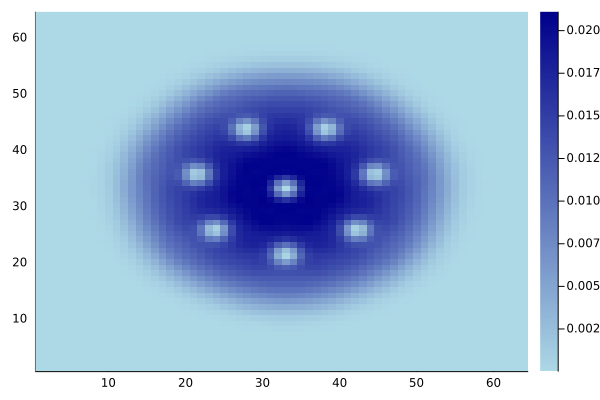

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)